In [19]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os

In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the static annotations dataset
# Replace 'path_to_static_annotations.csv' with the actual path to the dataset
static_annotations = pd.read_csv('../datasets/deam/DEAM_Annotations/annotations/annotations averaged per song/song_level/static_annotations_averaged_songs_1_2000.csv')
dynamic_annotations_arousal = pd.read_csv('../datasets/deam/DEAM_Annotations/annotations/annotations averaged per song/dynamic (per second annotations)/arousal.csv')
dynamic_annotations_valence = pd.read_csv('../datasets/deam/DEAM_Annotations/annotations/annotations averaged per song/dynamic (per second annotations)/valence.csv')
static_annotations.columns = static_annotations.columns.str.strip()
dynamic_annotations_arousal.columns = dynamic_annotations_arousal.columns.str.strip()
dynamic_annotations_valence.columns = dynamic_annotations_valence.columns.str.strip()

# Display the first few rows of the dataset
print("Dataset Preview:")
print(static_annotations.head())

# Basic information about the dataset
print("\nDataset Info:")
print(static_annotations.info())

# Summary statistics
print("\nSummary Statistics:")
print(static_annotations.describe())

Dataset Preview:
   song_id  valence_mean  valence_std  arousal_mean  arousal_std
0        2           3.1         0.94           3.0         0.63
1        3           3.5         1.75           3.3         1.62
2        4           5.7         1.42           5.5         1.63
3        5           4.4         2.01           5.3         1.85
4        7           5.8         1.47           6.4         1.69

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1744 entries, 0 to 1743
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   song_id       1744 non-null   int64  
 1   valence_mean  1744 non-null   float64
 2   valence_std   1744 non-null   float64
 3   arousal_mean  1744 non-null   float64
 4   arousal_std   1744 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 68.2 KB
None

Summary Statistics:
           song_id  valence_mean  valence_std  arousal_mean  arousal_std
count  1744.000000   

In [21]:
print("Columns in the dataset:")
print(static_annotations.columns)


Columns in the dataset:
Index(['song_id', 'valence_mean', 'valence_std', 'arousal_mean',
       'arousal_std'],
      dtype='object')


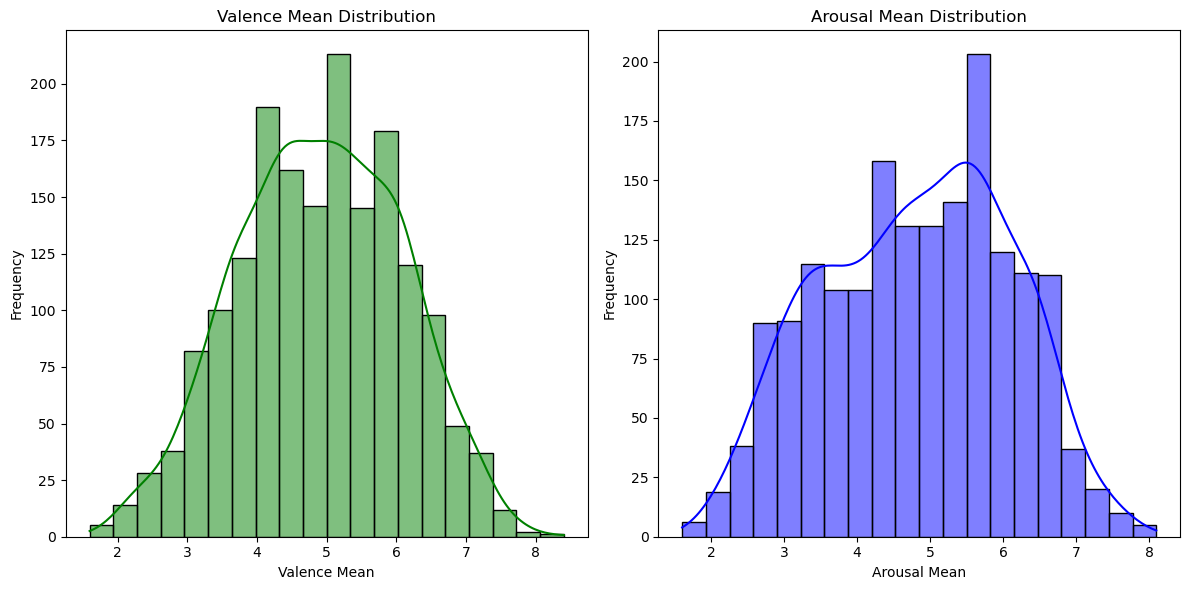

In [22]:
# Check the distribution of valence_mean and arousal_mean
plt.figure(figsize=(12, 6))

# Valence_mean distribution
plt.subplot(1, 2, 1)
sns.histplot(static_annotations['valence_mean'], kde=True, color='green', bins=20)
plt.title('Valence Mean Distribution')
plt.xlabel('Valence Mean')
plt.ylabel('Frequency')

# Arousal_mean distribution
plt.subplot(1, 2, 2)
sns.histplot(static_annotations['arousal_mean'], kde=True, color='blue', bins=20)
plt.title('Arousal Mean Distribution')
plt.xlabel('Arousal Mean')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

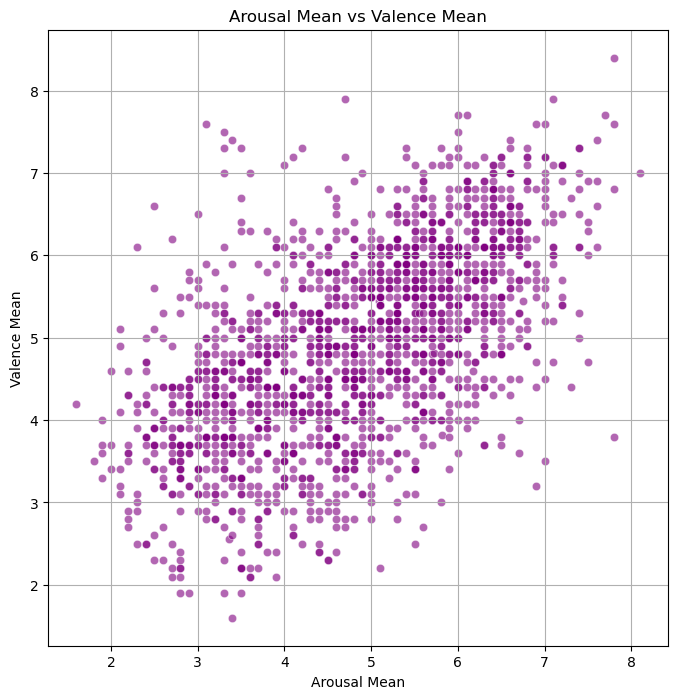

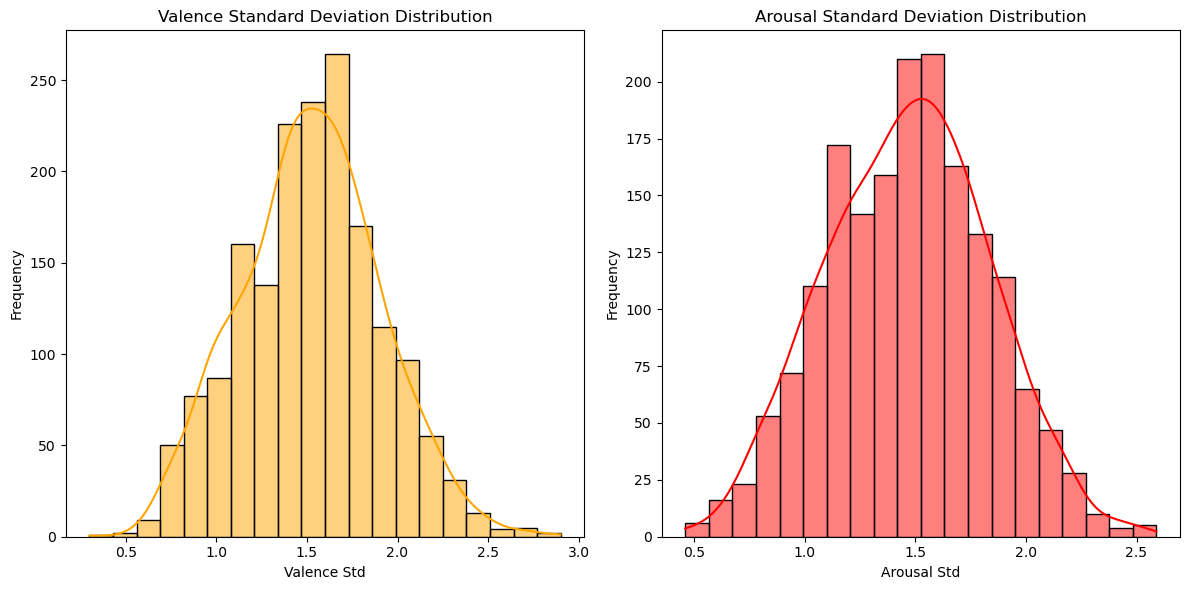

<Figure size 640x480 with 0 Axes>

In [23]:
# Scatter plot for arousal_mean vs valence_mean
plt.figure(figsize=(8, 8))
sns.scatterplot(x='arousal_mean', y='valence_mean', data=static_annotations, alpha=0.6, color='purple')
plt.title('Arousal Mean vs Valence Mean')
plt.xlabel('Arousal Mean')
plt.ylabel('Valence Mean')
plt.grid(True)
plt.show()

# Analyze variability (std columns)
plt.figure(figsize=(12, 6))

# Valence_std distribution
plt.subplot(1, 2, 1)
sns.histplot(static_annotations['valence_std'], kde=True, color='orange', bins=20)
plt.title('Valence Standard Deviation Distribution')
plt.xlabel('Valence Std')
plt.ylabel('Frequency')

# Arousal_std distribution
plt.subplot(1, 2, 2)
sns.histplot(static_annotations['arousal_std'], kde=True, color='red', bins=20)
plt.title('Arousal Standard Deviation Distribution')
plt.xlabel('Arousal Std')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()


In [24]:
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio, display
import os

# Load static annotations dataset
# Replace 'path_to_static_annotations.csv' with the correct file path
# static_annotations = pd.read_csv('/kaggle/input/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_Annotations/annotations/annotations averaged per song/song_level/static_annotations_averaged_songs_1_2000.csv')

# Define separate thresholds for arousal and valence
arousal_low_threshold = 2
arousal_high_threshold = 7.5
arousal_medium_range = (5, 5)

valence_low_threshold = 2
valence_high_threshold = 7.5
valence_medium_range = (5, 5)

# Categorize based on arousal
arousal_low = static_annotations[static_annotations['arousal_mean'] < arousal_low_threshold]
arousal_high = static_annotations[static_annotations['arousal_mean'] > arousal_high_threshold]
arousal_medium = static_annotations[static_annotations['arousal_mean'].between(*arousal_medium_range)]

# Categorize based on valence
valence_low = static_annotations[static_annotations['valence_mean'] < valence_low_threshold]
valence_high = static_annotations[static_annotations['valence_mean'] > valence_high_threshold]
valence_medium = static_annotations[static_annotations['valence_mean'].between(*valence_medium_range)]

# Print counts for each category
print(f"Arousal Low: {len(arousal_low)} songs")
print(f"Arousal High: {len(arousal_high)} songs")
print(f"Arousal Medium: {len(arousal_medium)} songs")
print(f"Valence Low: {len(valence_low)} songs")
print(f"Valence High: {len(valence_high)} songs")
print(f"Valence Medium: {len(valence_medium)} songs")

# Function to play audio and display waveform + spectrogram (with log scale)
def play_audio_with_visuals(file_path):
    print(f"Playing: {file_path}")
    y, sr = librosa.load(file_path, sr=None)  # Load the audio file
    
    # Plot waveform and spectrogram
    plt.figure(figsize=(12, 6))

    # Waveform plot
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title('Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    # Spectrogram plot with log scale
    plt.subplot(2, 1, 2)
    S = librosa.stft(y)  # Compute Short-Time Fourier Transform (STFT)
    S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)  # Convert amplitude to decibels
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='magma')  # Log scale for frequency
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram (Log Scale)')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')

    plt.tight_layout()
    plt.show()

    # Play audio
    display(Audio(file_path))


Arousal Low: 6 songs
Arousal High: 10 songs
Arousal Medium: 51 songs
Valence Low: 5 songs
Valence High: 10 songs
Valence Medium: 52 songs


## Arousal low


Id can be 0 to  6
Extreme Low Example: song_id         745.00
valence_mean      4.20
valence_std       1.08
arousal_mean      1.60
arousal_std       0.66
Name: 583, dtype: float64
Playing: ../datasets/deam/DEAM_audio/MEMD_audio\745.mp3


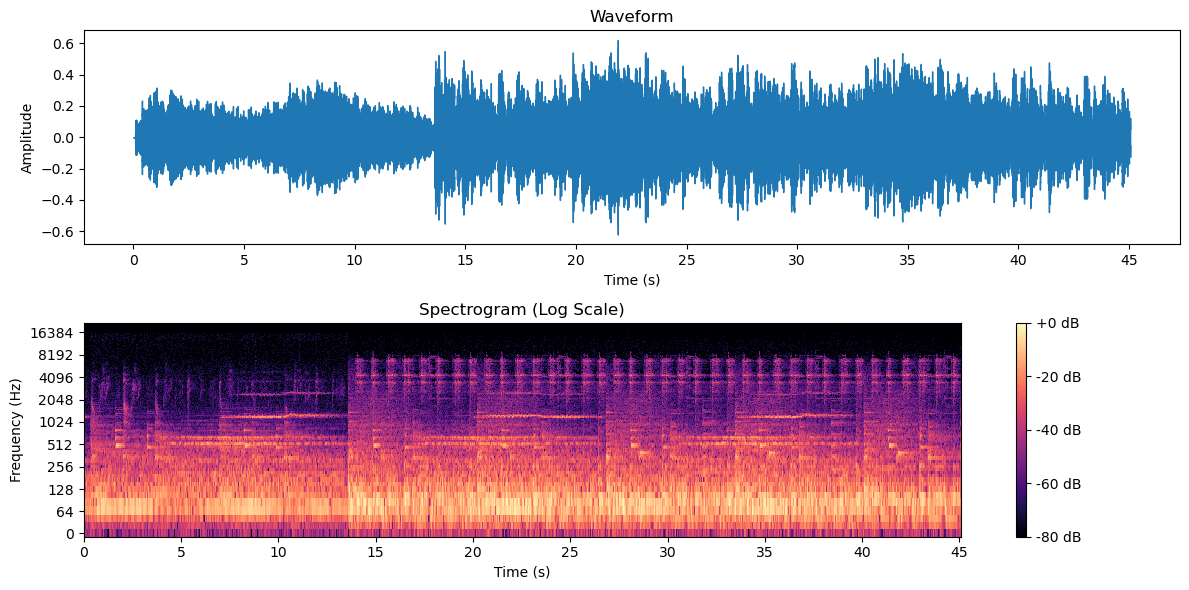

In [25]:
# Example: Play one audio from each category
print("Id can be 0 to ",len(arousal_low))
audio_id = 0
audio_path = "../datasets/deam/DEAM_audio/MEMD_audio"
if not arousal_low.empty:
    print("Extreme Low Example:", arousal_low.iloc[0])
    low_audio_path = os.path.join(audio_path, f"{int(arousal_low.iloc[audio_id]['song_id'])}.mp3")  # Corrected syntax
    play_audio_with_visuals(low_audio_path)

## Arousal Medium

Id can be 0 to  51
Extreme Low Example: song_id         105.00
valence_mean      6.50
valence_std       1.43
arousal_mean      5.00
arousal_std       1.41
Name: 79, dtype: float64
Playing: ../datasets/deam/DEAM_audio/MEMD_audio\105.mp3


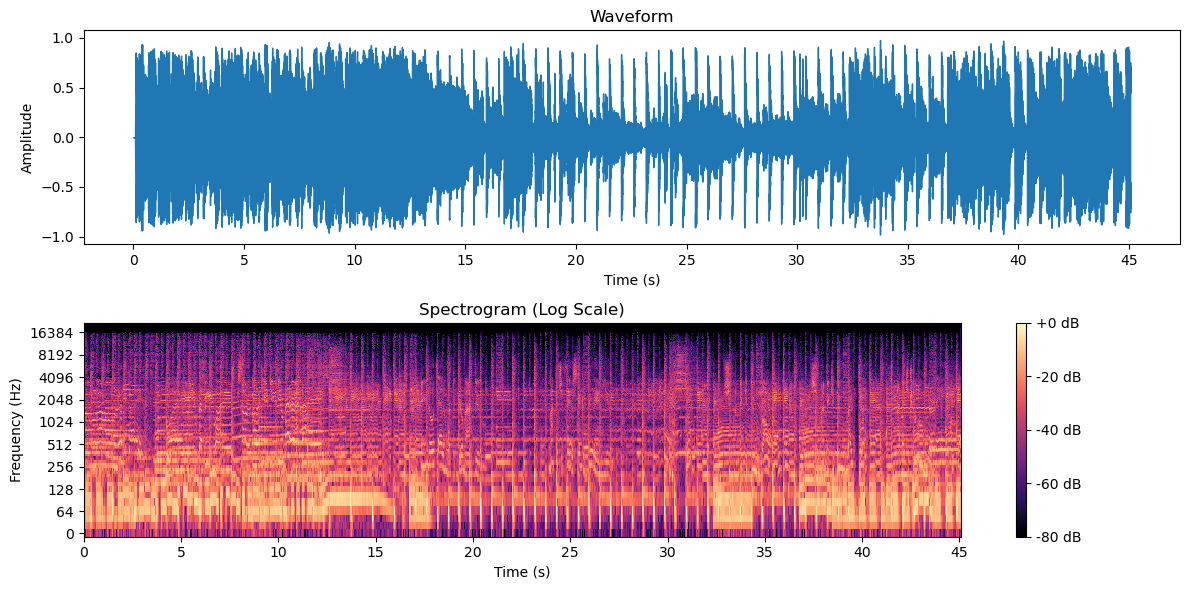

In [26]:
# Example: Play one audio from each category
print("Id can be 0 to ",len(arousal_medium))
audio_id = 0
if not arousal_medium.empty:
    print("Extreme Low Example:", arousal_medium.iloc[0])
    final_audio_path = os.path.join(audio_path, f"{int(arousal_medium.iloc[audio_id]['song_id'])}.mp3")  # Corrected syntax
    play_audio_with_visuals(final_audio_path)


## Arousal High

Id can be 0 to  10
arousal_high Example: song_id         115.00
valence_mean      8.40
valence_std       0.66
arousal_mean      7.80
arousal_std       1.17
Name: 89, dtype: float64
Playing: ../datasets/deam/DEAM_audio/MEMD_audio\115.mp3


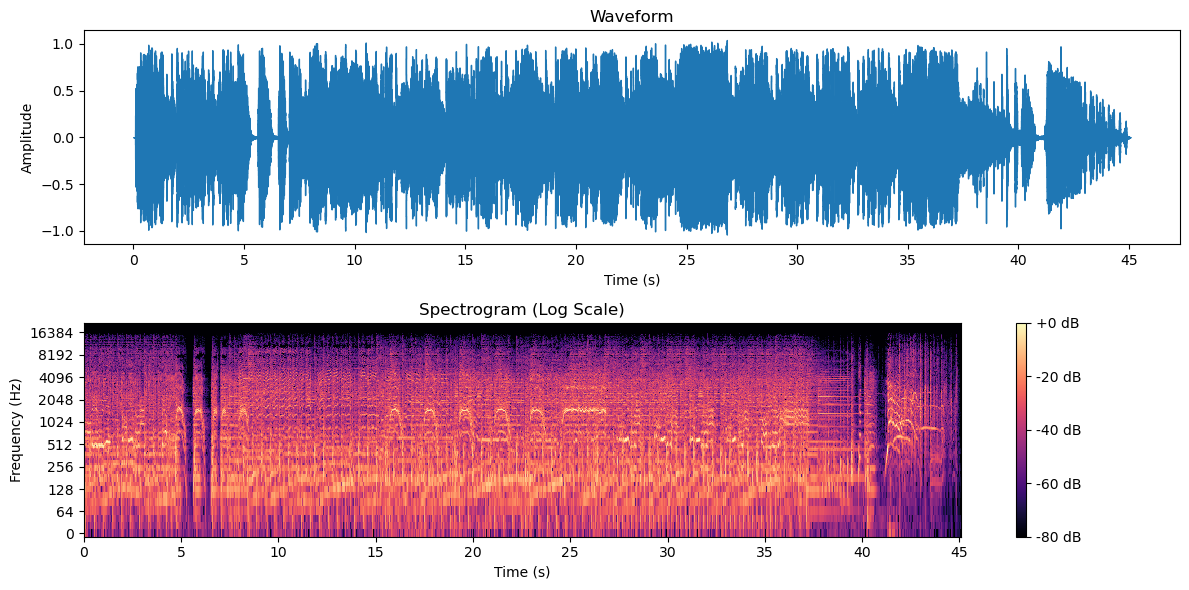

In [27]:
# Example: Play one audio from each category
print("Id can be 0 to ",len(arousal_high))
audio_id = 0
if not arousal_high.empty:
    print("arousal_high Example:", arousal_high.iloc[0])
    final_audio_path = os.path.join(audio_path, f"{int(arousal_high.iloc[audio_id]['song_id'])}.mp3")  # Corrected syntax
    play_audio_with_visuals(final_audio_path)


## Valence low

Id can be 0 to  5
Valence Low Example: song_id         115.00
valence_mean      8.40
valence_std       0.66
arousal_mean      7.80
arousal_std       1.17
Name: 89, dtype: float64
Playing: ../datasets/deam/DEAM_audio/MEMD_audio\198.mp3


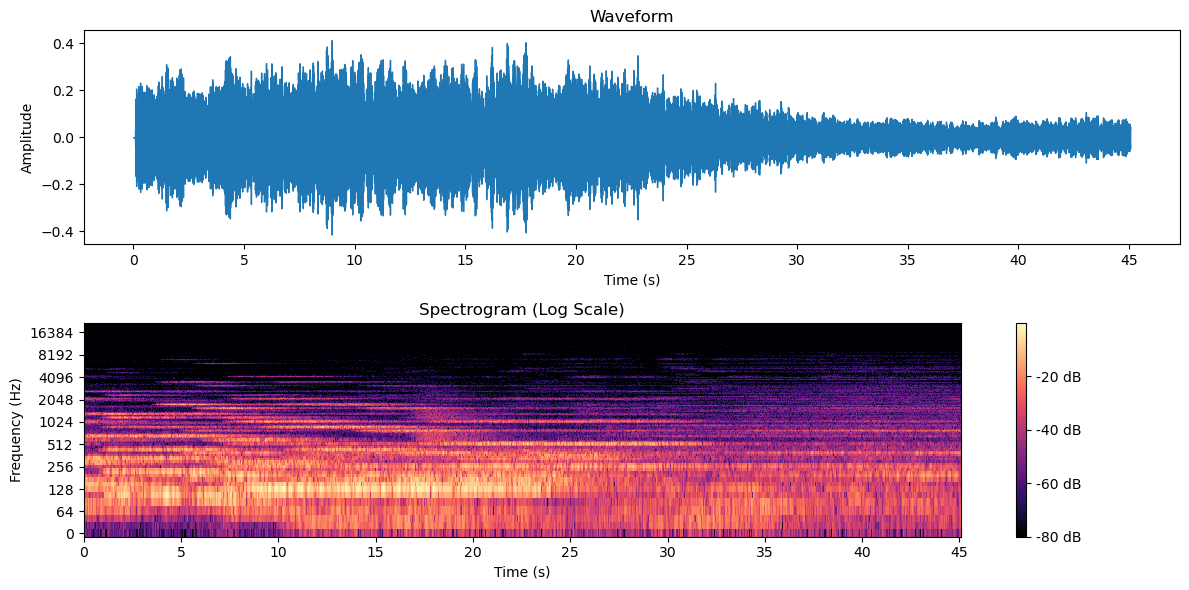

In [28]:
# Example: Play one audio from each category
print("Id can be 0 to ",len(valence_low))
audio_id = 0
if not arousal_high.empty:
    print("Valence Low Example:", arousal_high.iloc[0])
    final_audio_path = os.path.join(audio_path, f"{int(valence_low.iloc[audio_id]['song_id'])}.mp3")  # Corrected syntax
    play_audio_with_visuals(final_audio_path)

## Valence Medium


Id can be 0 to  52
Valence Low Example: song_id         150.00
valence_mean      5.00
valence_std       2.45
arousal_mean      5.40
arousal_std       2.20
Name: 120, dtype: float64
Playing: ../datasets/deam/DEAM_audio/MEMD_audio\150.mp3


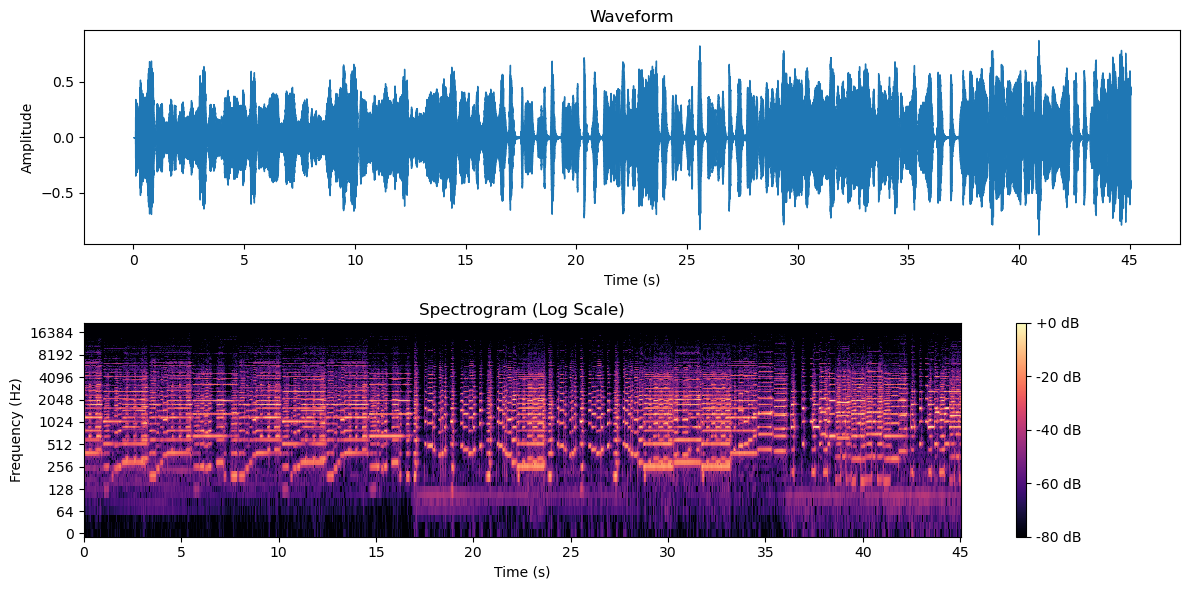

In [29]:
# Example: Play one audio from each category
print("Id can be 0 to ",len(valence_medium))
audio_id = 0
if not valence_medium.empty:
    print("Valence Low Example:", valence_medium.iloc[0])
    final_audio_path = os.path.join(audio_path, f"{int(valence_medium.iloc[audio_id]['song_id'])}.mp3")  # Corrected syntax
    play_audio_with_visuals(final_audio_path)

## Valence High

Id can be 0 to  10
Valence Low Example: song_id         25.00
valence_mean     7.90
valence_std      0.70
arousal_mean     4.70
arousal_std      2.53
Name: 16, dtype: float64
Playing: ../datasets/deam/DEAM_audio/MEMD_audio\25.mp3


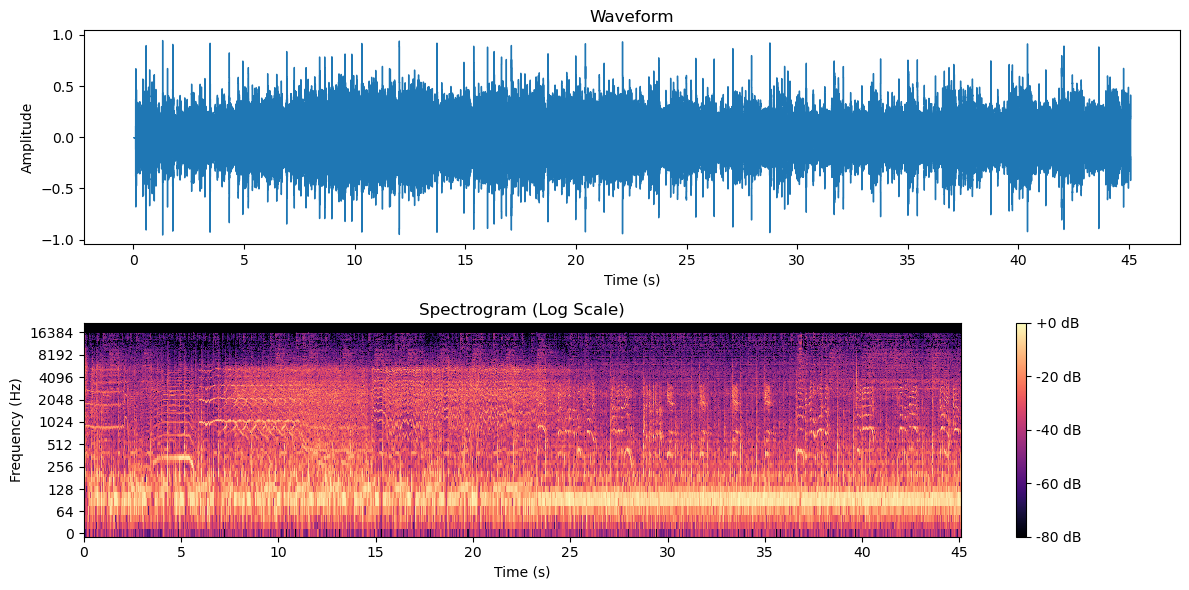

In [30]:
# Example: Play one audio from each category
print("Id can be 0 to ",len(valence_high))
audio_id = 0
if not valence_high.empty:
    print("Valence Low Example:", valence_high.iloc[0])
    final_audio_path = os.path.join(audio_path, f"{int(valence_high.iloc[audio_id]['song_id'])}.mp3")  # Corrected syntax
    play_audio_with_visuals(final_audio_path)

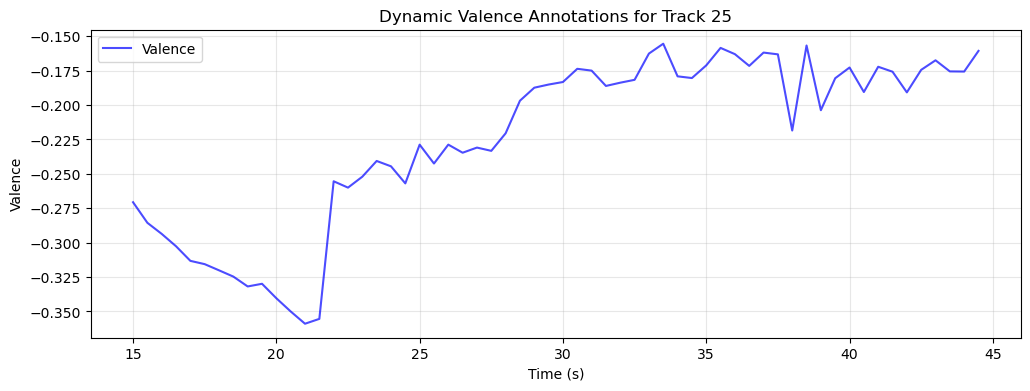

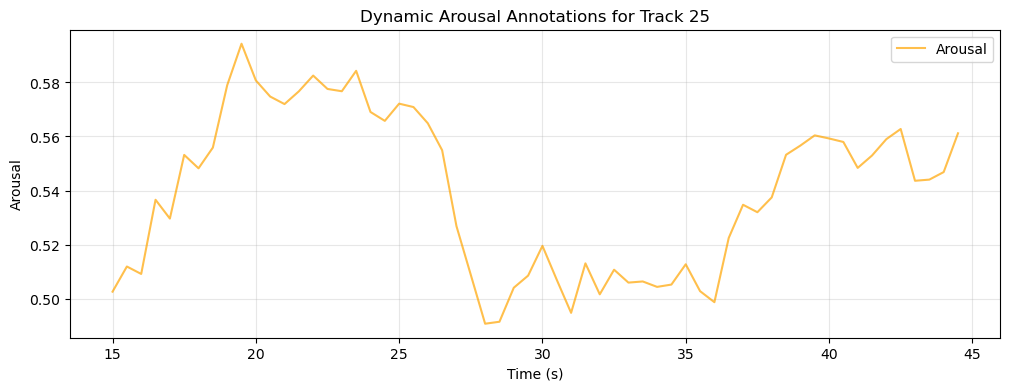

Playing: ../datasets/deam/DEAM_audio/MEMD_audio\25.mp3


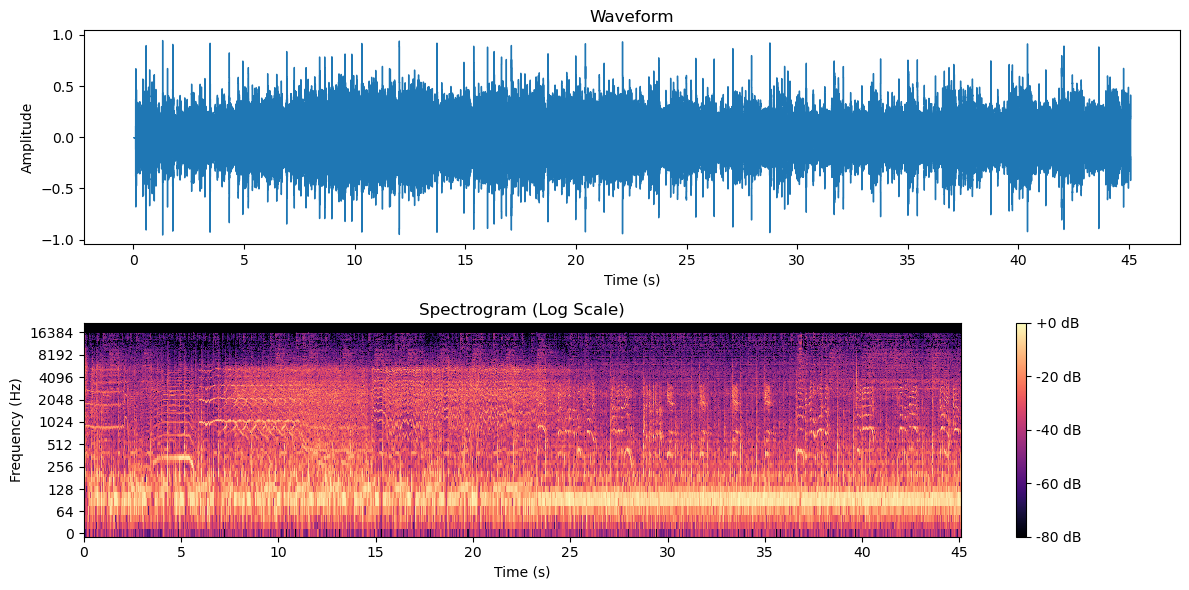

In [31]:
import numpy as np

# Example Track ID (replace with a specific index in valence_high DataFrame)
audio_id = 0  
song_id = int(valence_high.iloc[audio_id]['song_id'])  # Get the song ID
#song_id=2   # update this for play with specific song id
final_audio_path = os.path.join(audio_path, f"{song_id}.mp3")

# Filter dynamic annotations for the selected song
track_dynamic = dynamic_annotations_valence[dynamic_annotations_valence['song_id'] == song_id]
track_arousal = dynamic_annotations_arousal[dynamic_annotations_arousal['song_id'] == song_id]
# Ensure dynamic annotations are correctly formatted
# Convert columns like 'sample_15000ms', 'sample_15500ms', ... to time in seconds
time_columns = [col for col in track_dynamic.columns if col.startswith('sample_')]
time_values = np.array([int(col.split('_')[1][:-2]) / 1000 for col in time_columns])  # Extract times in seconds

# Extract values for valence and arousal
valence_values = track_dynamic[time_columns].values[0]  # Assuming a single row per song
arousal_values = track_arousal[time_columns].values[0]

# Plot dynamic annotations for Valence
plt.figure(figsize=(12, 4))
plt.plot(time_values, valence_values, label='Valence', color='blue', alpha=0.7)
plt.title(f'Dynamic Valence Annotations for Track {song_id}')
plt.xlabel('Time (s)')
plt.ylabel('Valence')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Plot dynamic annotations for Arousal
plt.figure(figsize=(12, 4))
plt.plot(time_values, arousal_values, label='Arousal', color='orange', alpha=0.7)
plt.title(f'Dynamic Arousal Annotations for Track {song_id}')
plt.xlabel('Time (s)')
plt.ylabel('Arousal')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Optionally play audio
play_audio_with_visuals(final_audio_path)


In [32]:
emotion_to_arousal_valence = {
    'happy': {'arousal': (0.7, 1), 'valence': (0.7, 1)},       # High arousal, high valence
    'sad': {'arousal': (0, 0.3), 'valence': (0, 0.3)},         # Low arousal, low valence
    'angry': {'arousal': (0.7, 1), 'valence': (0, 0.3)},       # High arousal, low valence
    'neutral': {'arousal': (0.4, 0.6), 'valence': (0.4, 0.6)}, # Medium arousal, medium valence
    'fear': {'arousal': (0.5, 0.8), 'valence': (0, 0.4)},      # Medium-high arousal, low-medium valence
    'surprise': {'arousal': (0.8, 1), 'valence': (0.5, 0.9)},  # High arousal, medium-high valence
}

In [33]:
def predict_emotion(arousal, valence):
    for emotion, ranges in emotion_to_arousal_valence.items():
        if ranges['arousal'][0] <= arousal <= ranges['arousal'][1] and ranges['valence'][0] <= valence <= ranges['valence'][1]:
            return emotion
    return "unknown"
static_annotations['predicted_emotion'] = static_annotations.apply(
    lambda x: predict_emotion(x['arousal_mean'], x['valence_mean']), axis=1
)

In [35]:
print(static_annotations['emotion_label'].value_counts())

emotion_label
0    1744
Name: count, dtype: int64


In [37]:
print(static_annotations[['arousal_mean', 'valence_mean']].describe())


       arousal_mean  valence_mean
count   1744.000000   1744.000000
mean       4.812603      4.903492
std        1.289368      1.173920
min        1.600000      1.600000
25%        3.800000      4.100000
50%        4.900000      4.900000
75%        5.800000      5.800000
max        8.100000      8.400000


In [38]:
print(static_annotations[['arousal_mean', 'valence_mean']].describe())

       arousal_mean  valence_mean
count   1744.000000   1744.000000
mean       4.812603      4.903492
std        1.289368      1.173920
min        1.600000      1.600000
25%        3.800000      4.100000
50%        4.900000      4.900000
75%        5.800000      5.800000
max        8.100000      8.400000


In [39]:
emotion_to_arousal_valence = {
    'happy': {'arousal': (4, 10), 'valence': (6, 10)},  # Adjusted thresholds
    'sad': {'arousal': (0, 4), 'valence': (0, 4)},
    'angry': {'arousal': (6, 10), 'valence': (0, 4)},
    'neutral': {'arousal': (4, 6), 'valence': (4, 6)},
    'fear': {'arousal': (5, 8), 'valence': (0, 5)},
    'surprise': {'arousal': (7, 10), 'valence': (6, 10)},
}

In [40]:
static_annotations['predicted_emotion'] = static_annotations.apply(
    lambda x: predict_emotion(x['arousal_mean'], x['valence_mean']), axis=1
)
print(static_annotations['predicted_emotion'].value_counts())


predicted_emotion
neutral    601
unknown    443
happy      346
sad        254
fear        86
angry       14
Name: count, dtype: int64


In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode the target variable
label_encoder = LabelEncoder()
static_annotations['emotion_label'] = label_encoder.fit_transform(static_annotations['predicted_emotion'])

# Select features (arousal and valence) and target (emotion_label)
X = static_annotations[['arousal_mean', 'valence_mean']]
y = static_annotations['emotion_label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Print class distribution in training set to confirm balance
print(pd.Series(y_train).value_counts())


emotion_label
3    481
5    354
2    277
4    203
1     69
0     11
Name: count, dtype: int64


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       angry       1.00      0.67      0.80         3
        fear       1.00      1.00      1.00        17
       happy       1.00      1.00      1.00        69
     neutral       0.99      1.00      1.00       120
         sad       1.00      1.00      1.00        51
     unknown       1.00      1.00      1.00        89

    accuracy                           1.00       349
   macro avg       1.00      0.94      0.97       349
weighted avg       1.00      1.00      1.00       349

Confusion Matrix:
[[  2   0   0   1   0   0]
 [  0  17   0   0   0   0]
 [  0   0  69   0   0   0]
 [  0   0   0 120   0   0]
 [  0   0   0   0  51   0]
 [  0   0   0   0   0  89]]


In [43]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Train an SVM model
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_))

print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


SVM Classification Report:
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00         3
        fear       0.68      0.76      0.72        17
       happy       1.00      1.00      1.00        69
     neutral       0.97      0.96      0.97       120
         sad       0.96      0.94      0.95        51
     unknown       0.94      0.98      0.96        89

    accuracy                           0.95       349
   macro avg       0.76      0.77      0.77       349
weighted avg       0.94      0.95      0.95       349

SVM Confusion Matrix:
[[  0   3   0   0   0   0]
 [  0  13   0   3   0   1]
 [  0   0  69   0   0   0]
 [  0   3   0 115   0   2]
 [  0   0   0   0  48   3]
 [  0   0   0   0   2  87]]


c:\Users\Moufid\anaconda3\envs\ds\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Moufid\anaconda3\envs\ds\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Moufid\anaconda3\envs\ds\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [46]:
from xgboost import XGBClassifier

# Train an XGBoost model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))

print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


ModuleNotFoundError: No module named 'xgboost'